BÀI 12: PHÂN TÍCH DỮ LIỆU CHUỖI THỜI GIAN (TIME SERIES ANALYSIS)

In [2]:
# import thư viện
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime #xử lý dữ liệu về ngày tháng
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

C:\Users\Quynh Nhu\AppData\Local\Temp\ipykernel_8984\1231363699.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime #xử lý dữ liệu về ngày tháng


In [3]:
# hàm xử lý ngày tháng
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

In [4]:
# Import data (Nguồn: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
data=df.values

C:\Users\Quynh Nhu\AppData\Local\Temp\ipykernel_8984\2916693429.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [5]:
df

Month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
1991-04-01    119.3
1991-05-01    180.3
1991-06-01    168.5
1991-07-01    231.8
1991-08-01    224.5
1991-09-01    192.8
1991-10-01    122.9
1991-11-01    336.5
1991-12-01    185.9
1992-01-01    194.3
1992-02-01    149.5
1992-03-01    210.1
1992-04-01    273.3
1992-05-01    191.4
1992-06-01    287.0
1992-07-01    226.0
1992-08-01    303.6
1992-09-01    289.9
1992-10-01    421.6
1992-11-01    264.5
1992-12-01    342.3
1993-01-01    339.7
1993-02-01    440.4
1993-03-01    315.9
1993-04-01    439.3
1993-05-01    401.3
1993-06-01    437.4
1993-07-01    575.5
1993-08-01    407.6
1993-09-01    682.0
1993-10-01    475.3
1993-11-01    581.3
1993-12-01    646.9
Name: Sales, dtype: float64

Text(0.5, 0, 'Time (Month)')

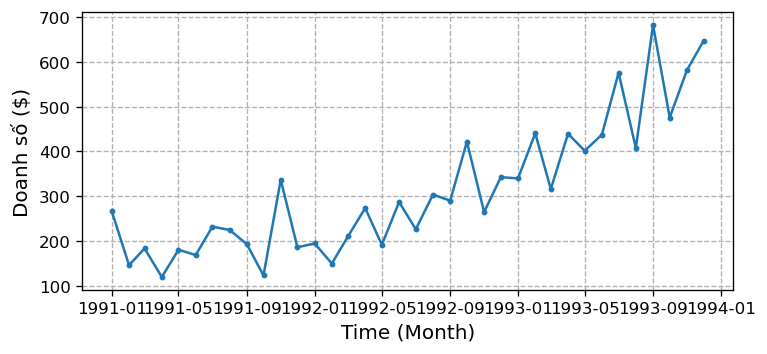

In [6]:
# hiển thị dữ liệu gốc
plt.plot(df,'.-',markersize=5)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)', fontsize=12)
plt.xlabel('Time (Month)',fontsize=12)

In [7]:
# thử tính Movinf average bằng cách thủ công
# program to calculate moving average
MA=3 # test với MA là 3, có thể thay MA = 2 3 4 5 6 ...  để test
df_MA = []
i = 0
while i < len(data) - MA + 1:
    j = data[i : i + MA] # lựa chọn data để tính trung bình
    j_average = round(sum(j)/MA,2) # tính trung bình (MA), làm tròn tới 2 chữ số thập phân
    df_MA.append(j_average) # append giá trị và list rỗng đã khai báo
    i += 1
print(df_MA)

[198.33, 149.43, 160.9, 156.03, 193.53, 208.27, 216.37, 180.07, 217.4, 215.1, 238.9, 176.57, 184.63, 210.97, 224.93, 250.57, 234.8, 272.2, 273.17, 338.37, 325.33, 342.8, 315.5, 374.13, 365.33, 398.53, 385.5, 426.0, 471.4, 473.5, 555.03, 521.63, 579.53, 567.83]


In [8]:
# chúng ta tính moving average bằng các dùng thư viện pandas (hàm rolling có sẵn trong pandas)
MA=3
j = df.rolling(MA)
j_average = round(j.mean(),2)
j_average_list = j_average.tolist() # đổi kiểu pandas frame về kiểu list
df_MA2 = j_average_list[MA-1:]
print(df_MA2)

[198.33, 149.43, 160.9, 156.03, 193.53, 208.27, 216.37, 180.07, 217.4, 215.1, 238.9, 176.57, 184.63, 210.97, 224.93, 250.57, 234.8, 272.2, 273.17, 338.37, 325.33, 342.8, 315.5, 374.13, 365.33, 398.53, 385.5, 426.0, 471.4, 473.5, 555.03, 521.63, 579.53, 567.83]


[178.92, 159.42, 176.6, 184.88, 199.58, 188.1, 221.7, 212.52, 206.48, 197.82, 215.26, 202.62, 203.72, 222.26, 237.56, 256.26, 259.58, 305.62, 301.12, 324.38, 331.6, 361.7, 340.56, 375.52, 387.32, 406.86, 433.88, 452.22, 500.76, 515.56, 544.34, 558.62]


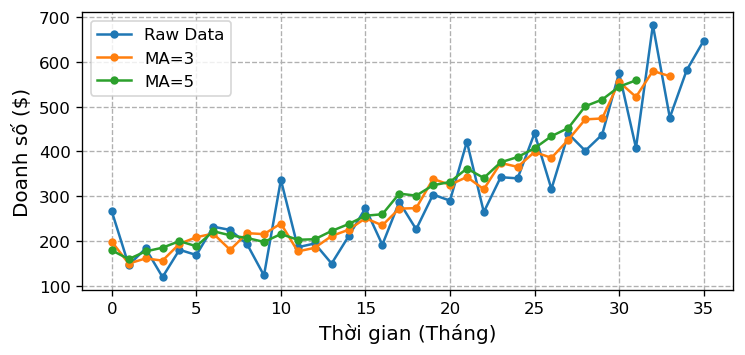

In [9]:
# chúng ta thử vẽ đường MA=3 và MA=5
MA = 5
df_MA5 = []
i=0
while i < len(data) - MA+1:
    j = data[i:i+MA]
    j_average = round(sum(j)/MA,2)
    df_MA5.append(j_average)
    i+=1
print(df_MA5)

plt.plot(df.values,'.-',markersize=8)
plt.plot(df_MA,'.-',markersize=8)
plt.plot(df_MA5,'.-',markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)', fontsize=12)
plt.xlabel('Thời gian (Tháng)', fontsize=12)
plt.legend(['Raw Data','MA=3','MA=5'])

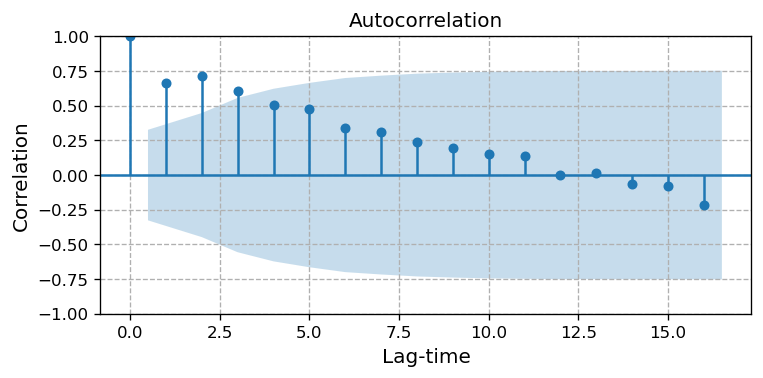

In [10]:
# VẼ TƯƠNG QUAN GIỮA DATA GỐC VỚI CÁC CHUỖI MA (TÌM MA)

plot_acf(df.values) # hàm vẽ acf
plt.grid(linestyle='--')
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Lag-time', fontsize=12)
plt.show()

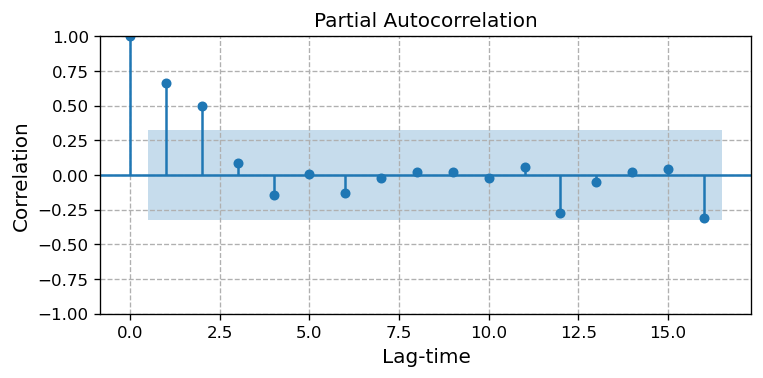

In [11]:
# vẽ tương quan giữa data gốc với các lag-time của nó - tương tự tương quan (ar) (tìm ar)
plot_pacf(df.values)
plt.grid(linestyle='--')
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Lag-time',fontsize=12)
plt.show()

In [12]:
# dự báo với mô hình arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
X = df.values

In [14]:
len(X)

36

In [15]:
size = int(len(X) * 0.7)

In [16]:
size

25

In [17]:
size = int(len(X)*0.7)
train, test = X[0:size], X[size:len(X)]
history = [i for i in train]
predictions = []
# dự báo 1 bước thời gian
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3)) # cài đặt p(AR), d(I), q(MA)
    model_fit = model.fit()
    output = model_fit.forecast() # dự báo cho t+1
    y_pred = output[0] # giá trị dự báo t+1
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)
    print('Giá trị dự báo = %f, Gía trị thực tế = %f' % (y_pred, obs)) # hiển thị giá trị dự báo của từng bước thời gian

# evaluate forecasts
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)

Giá trị dự báo = 365.788199, Gía trị thực tế = 440.400000
Giá trị dự báo = 362.017181, Gía trị thực tế = 315.900000
Giá trị dự báo = 423.407800, Gía trị thực tế = 439.300000
Giá trị dự báo = 375.000828, Gía trị thực tế = 401.300000
Giá trị dự báo = 455.359394, Gía trị thực tế = 437.400000
Giá trị dự báo = 421.618886, Gía trị thực tế = 575.500000


c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Giá trị dự báo = 453.364354, Gía trị thực tế = 407.600000
Giá trị dự báo = 536.537466, Gía trị thực tế = 682.000000


c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Giá trị dự báo = 512.744620, Gía trị thực tế = 475.300000
Giá trị dự báo = 670.708068, Gía trị thực tế = 581.300000
Giá trị dự báo = 606.510746, Gía trị thực tế = 646.900000
MSE: 6083.71
RMSE: 78.00


In [18]:
output

array([606.51074572])

In [19]:
y_pred = output[0]

In [20]:
y_pred

606.5107457155525

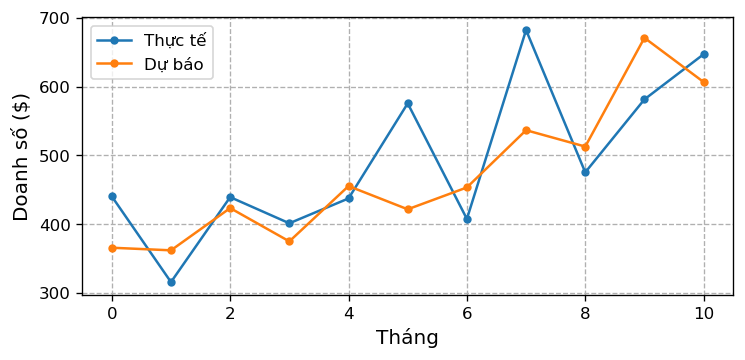

In [22]:
# hiển thị dữ liệu trong test set và dữ liệu dự báo
plt.plot(test,'.-',markersize=8)
plt.plot(predictions,'.-',markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)', fontsize=12)
plt.xlabel('Tháng', fontsize=12)
plt.legend(['Thực tế','Dự báo'])

In [23]:
# ví dụ dự báo nhiều bước thời gian
X = df.values
size = int(len(X)*0.7)
train, test = X[0:size], X[size:len(X)]
history = [i for i in train]
predictions = []
# dự báo 11 bước thời gian
for t in range(11):
    model = ARIMA(history, order=(3,1,2)) # cài đặt p(AR), d(I), q(MA)
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    history.append(y_pred)

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [24]:
predictions

[384.9452413625108,
 351.194228031052,
 335.97542980593954,
 324.97052534940013,
 355.95050654696695,
 366.52387417823667,
 356.81681232673975,
 333.17655010093773,
 334.4029041643093,
 351.96513441104054,
 364.2198800842891]

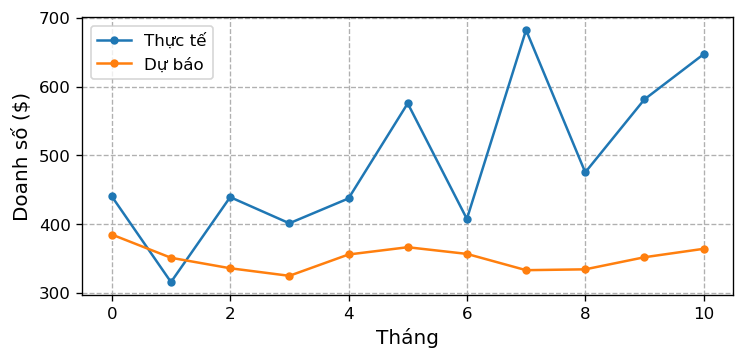

In [25]:
# hiển thị dữ liệu trong test set và dữ liệu dự báo
plt.plot(test,'.-',markersize=8)
plt.plot(predictions,'.-',markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)', fontsize=12)
plt.xlabel('Tháng', fontsize=12)
plt.legend(['Thực tế','Dự báo'])

In [26]:
#!pip uninstall statsmodels
#!pip install statsmodels

In [27]:
#Dùng auto arima để lựa chọn AR-p,I-d,MA-q
# Thư viện cung cấp phương pháp test adf và chỉ số AIC, chỉ số AIC càng nhỏ thì mô hình càng phù hợp
#!pip uninstall pmdarima
!pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     -- ------------------------------------- 30.7/566.2 kB ? eta -:--:--
     -- ------------------------------------- 30.7/566.2 kB ? eta -:--:--
     ------- ------------------------------ 112.6/566.2 kB 1.1 MB/s eta 0:00:01
     ------------- ------------------------ 194.6/566.2 kB 1.2 MB/s eta 0:00:01
     ---------------- --------------------- 245.8/566.2 kB 1.4 MB/s eta 0:00:01
     --------------------------------- ---- 501.8/566.2 kB 2.1 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/39/5d/5ae976df4e368327864917a24f9dee7c8176de1b5b7044ee9903b8adb07a/Cython-3.0.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [28]:
import pmdarima as pm


In [29]:
model = pm.auto_arima(train, start_P=1, start_Q=1,
                      test = 'kpss', # sử dụng kpss test để tìm tối ưu 'd'
                      max_p = 5, max_q = 5,
                      d = None, #N seasonality
                      start_p=0,
                      D=0,
                      information_criterion='oob',
                      trace = True,
                      error_action = 'ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

c:\Users\Quynh Nhu\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=273.521, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=286.959, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=275.485, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=284.988, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=273.183, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=276.604, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=273.988, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.963 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   N